In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('dataset\Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
for i in df.columns:
    print(f'{i}:\n{df[i].unique()}\n--------------------------------------------------------')

Airline:
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
--------------------------------------------------------
Date_of_Journey:
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
--------------------------------------------------------
Source:
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------------------------------------

In [ ]:
df.Date_of_Journey = df.Date_of_Journey.astype(np.datetime64)


In [19]:
import re

In [28]:
def func1(x):
    h = re.findall('[\d]+h', x)
    m = re.findall('[\d]+m', x)
    if len(h) == 0:
        h = 0
    else:
        h = h[0][:-1]
        h = int(h)
    if len(m) == 0:
        m = 0
    else:
        m = m[0][:-1]
        m = int(m)
    
    return h*60 + m

In [30]:
df.Duration = df.Duration.apply(func1)

In [35]:
df.Route = df.Route.str.replace('→', '-')

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR - DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL - LKO - BOM - COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,285,1 stop,No info,13302


In [44]:
df1 = df.groupby('Airline').mean()
df1

,Duration,Price
Airline,,
Air Asia,348.275862,5590.260188
Air India,943.253425,9611.210616
GoAir,298.969072,5861.056701
IndiGo,285.406722,5673.682903
Jet Airways,849.733697,11643.923357
Jet Airways Business,386.666667,58358.666667
Multiple carriers,625.769231,10902.678094
Multiple carriers Premium economy,606.538462,11418.846154
SpiceJet,178.484108,4338.284841


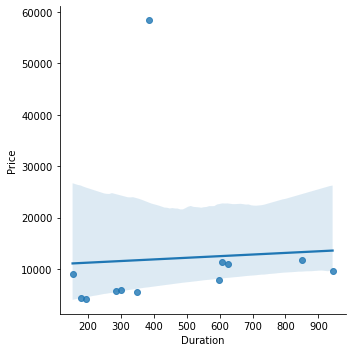

In [42]:
sns.lmplot(data=df1, x='Duration', y='Price');